# Reconstructing Trajectories with BSplines

In [12]:
using TaD, Plots

## Example: Helix in 3-D

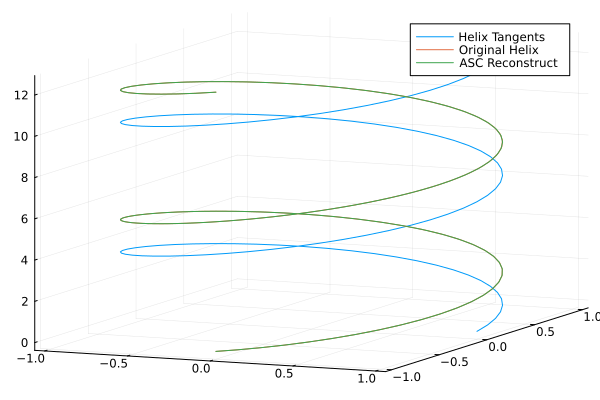

In [13]:
T = construct_helix_tangents(100)
H = construct_helix(100)
tup = asc(T[:,3], T, [0.,-1.,0.])
Curve = reconstruct_trajectory(hcat(tup[1], tup[2], T[:, 3]))
plot(tuple(T[:,1], T[:,2], T[:,3]), label="Helix Tangents")
plot!(tuple(H[:,1], H[:,2], T[:,3]), label="Original Helix")
plot!(Curve, label="ASC Reconstruct")

#print("Error: ", norm(hcat(tup[1], tup[2], T[:,3]) - H))
#print("\nTangents Distance: ", norm(T - H))

## Example: Test data from Abughaban et al.

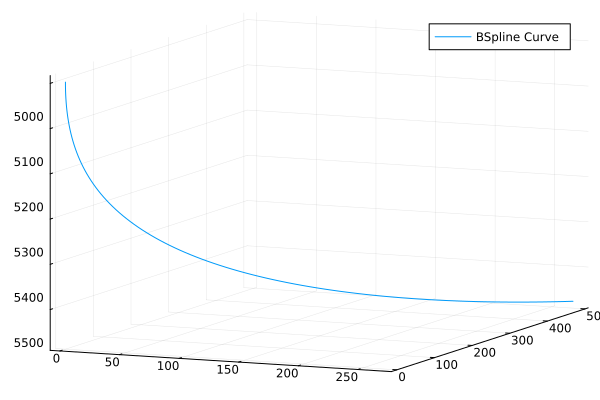

In [14]:
#Test data from Abughaban et al. https://onepetro.org/SPEDC/proceedings/16DC/3-16DC/Fort%20Worth,%20Texas,%20USA/207817
MD = collect(5000:100:5900)
θ, ϕ = to_radian(collect(0:5:45)), to_radian(collect(0:10:90))
λ = asc_tangents(MD, θ, ϕ)
tup = asc(MD, λ, [0., 0., 5000.])
Curve = reconstruct_trajectory(hcat(tup...))
plot(Curve, zaxis=(:flip))

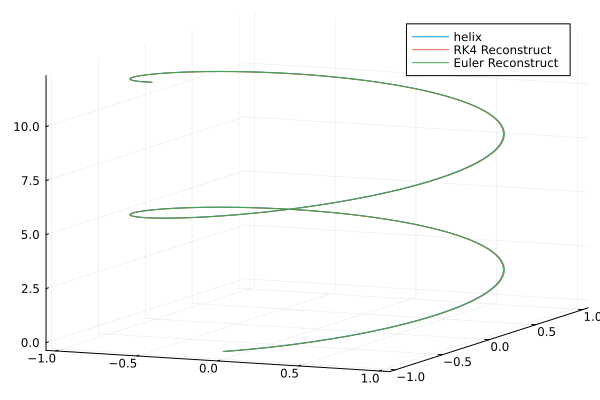

In [15]:
#Fundamentally, the ASC algorithm used to reconstruct a curve from its tangents is an euler method similar to RK4. 
# Here is the recreation of a helix in 3d using Rk4 and Euler Method: 
function rk4(∇f, x, δ)
    return (∇f.(x) + 4*∇f.(x.+δ/2) + ∇f.(x.+δ))*δ/6
end
function euler(∇f, x, δ)
    return (∇f.(x))*δ
end
f(x) = sin(x)
df(x) = cos(x)
g(x) = -cos(x)
dg(x) = sin(x)
rk4(df, 0:.1:12, .1)
plot((f.(0:.1:12), g.(0:.1:12), 0:.1:12), label="helix")
#plot!((df.(0:.1:12), dg.(0:.1:12), 0:.1:12), label="tangents")
plot!((cumsum(rk4(df, 0:.01:12, .01)), cumsum(rk4(dg, 0:.01:12, .01))  .- 1 , 0:.01:12), label="RK4 Reconstruct")
plot!((cumsum(euler(df, 0:.01:12, .01)), cumsum(euler(dg, 0:.01:12, .01))  .- 1 , 0:.01:12), label="Euler Reconstruct")


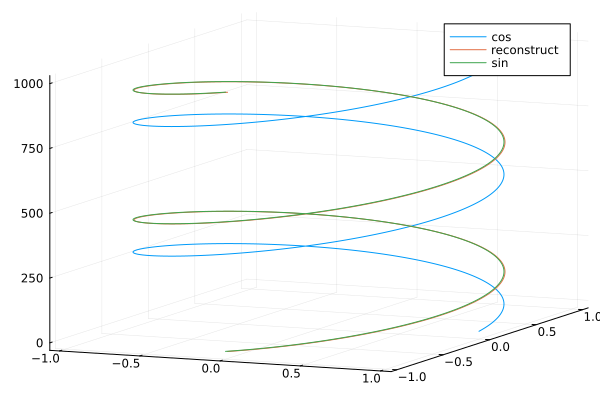

In [16]:
#Here is the same algorithm without using julia functions
λ = construct_helix_tangents(1000)
h = construct_helix(1000)
γ = hcat(map(x->cumsum(x .* (4*π/1000)), (λ[:,1], λ[:,2]))...)
plot(tuple(λ[:,1], λ[:,2], 1:1:length(λ[:,1])), label="cos")
plot!(tuple(γ[:,1], γ[:,2] .- 1, 1:1:length(γ[:,1])), label="reconstruct")
plot!(tuple(h[:,1], h[:,2], 1:1:length(h[:,1])), label="sin")